**Foundations of Prob. IR - Probability **

*Probability is the branch of mathematics that studies how to deal with uncertainity.*

*Information Retrieval (IR), Machine Learning (ML) and Text Mining relies heavily on Probabilistic foundations, so it is essential to understand what probability theory is, what probabilistic distributions are, and what operations you can perform with them, and how they can be useful.*


In this notebook we'll compute the Maximum Likelihood Estimation (MLE) for a normal distribution.

In [20]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

## Normal Distribution
We'll start by sampling some data from a normal distribution.

In [21]:
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 1000)

Now we'll define functions that given our data, will compute the MLE for the $\mu$ and $\sigma$ parameters of the normal distribution.

Recall that

$$\hat\mu = \frac{1}{T}\sum_{t=1}^{T} x_t$$

$$\hat\sigma = \sqrt{\frac{1}{T}\sum_{t=1}^{T}{(x_t - \hat\mu)^2}}$$


### Procedure for $\mu$

In [28]:
def normal_mu_MLE(X):
    # Get the number of observations
    T = len(X)
    # Sum the observations
    s = sum(X)
    return 1.0/T * s


### Procedure for $\sigma$

In [29]:
def normal_sigma_MLE(X):
    T = len(X)
    # Get the mu MLE
    mu = normal_mu_MLE(X)
    # Sum the square of the differences
    s = sum( np.power((X - mu), 2) )
    # Compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

Now let's try our functions out on our sample data and see how they compare to the built-in `np.mean` and `np.std`

In [23]:
print("Mean Estimation")
print("================")
print(normal_mu_MLE(X))
print(np.mean(X)) 
print("Standard Deviation Estimation") 
print("================")
print(normal_sigma_MLE(X)) 
print(np.std(X)) 

Mean Estimation
39.6845042922
39.6845042922
Standard Deviation Estimation
9.818311225223802
9.81831122522


Now let's estimate both parameters at once with scipy's built in `fit()` function.

In [24]:
mu, std = scipy.stats.norm.fit(X)
print ("mu estimate: " + str(mu))
print ("std estimate: " + str(std))

mu estimate: 39.6845042922
std estimate: 9.81831122522


Now let's plot the distribution PDF along with the data to see how well it fits. We can do that by accessing the pdf provided in `scipy.stats.norm.pdf`.

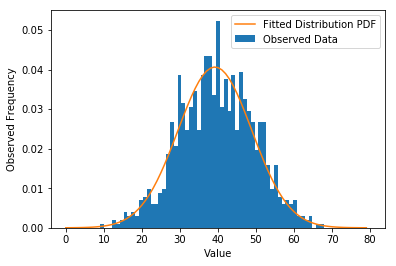

In [27]:
pdf = scipy.stats.norm.pdf

# We would like to plot our data along an x-axis ranging from 0-80 with 80 intervals
# (increments of 1)

x = np.linspace(0, 80, 80)
plt.hist(X, bins=x, normed='true')
plt.plot(pdf(x, loc=mu, scale=std))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);
plt.show()

### Can you write down procedures to determine the MLE for the parameters of the Poisson distribution ?

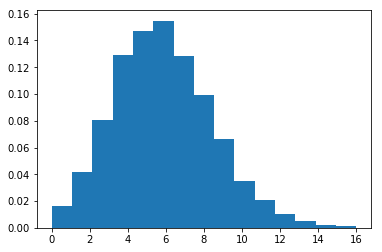

In [40]:
s = np.random.poisson(6, 10000)
np.prod
count, bins, ignored = plt.hist(s, 15, normed=True)
plt.show()